In [18]:
from astropy.io import fits

# open fits file as fits_file
fits_file = fits.open('JWST/jw02733-o001_t001_nircam_clear-f090w/jw02733-o001_t001_nircam_clear-f090w_i2d.fits')

# Print the list of HDUs
print(fits_file.info())

Filename: JWST/jw02733-o001_t001_nircam_clear-f090w/jw02733-o001_t001_nircam_clear-f090w_i2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     365   ()      
  1  SCI           1 ImageHDU        75   (4916, 4894)   float32   
  2  ERR           1 ImageHDU        10   (4916, 4894)   float32   
  3  CON           1 ImageHDU        10   (4916, 4894, 1)   int32   
  4  WHT           1 ImageHDU         9   (4916, 4894)   float32   
  5  VAR_POISSON    1 ImageHDU         9   (4916, 4894)   float32   
  6  VAR_RNOISE    1 ImageHDU         9   (4916, 4894)   float32   
  7  VAR_FLAT      1 ImageHDU         9   (4916, 4894)   float32   
  8  HDRTAB        1 BinTableHDU    844   32R x 417C   [23A, 5A, 3A, 45A, 7A, 13A, 7A, 5A, 6A, 7A, 10A, 4A, L, D, D, D, D, 32A, 50A, 32A, 21A, 3A, 3A, D, D, 10A, 12A, 23A, 23A, 26A, 11A, 5A, 3A, 3A, 2A, 1A, 2A, 1A, L, 14A, 23A, 2A, 26A, 20A, 27A, 10A, K, L, L, L, L, 8A, 8A, 5A, D, D, D, D, D, D, 27A, D, D, D, 

In [19]:
sci_image_data = fits_file[1].data
print(sci_image_data)


[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


TypeError: Image data of dtype object cannot be converted to float

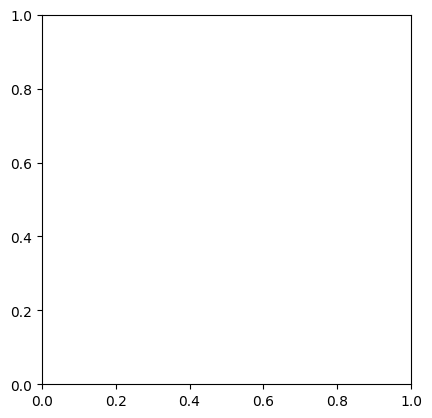

In [4]:
# add LogNorm and change cmap to 'Greys'
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

plt.figure()
plt.imshow(image_data, origin = 'lower', cmap='viridis', norm=LogNorm())
plt.colorbar()
plt.show()

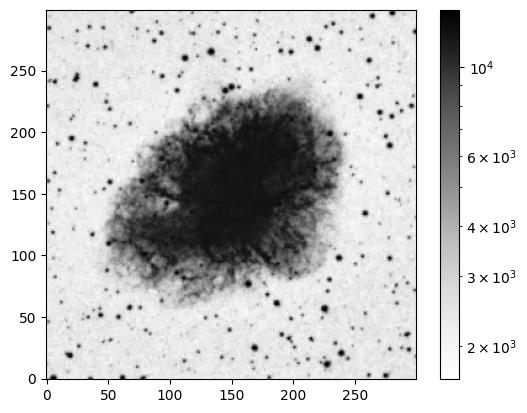

In [28]:
# add LogNorm and change cmap to 'Greys'
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

plt.figure()
plt.imshow(image_data, origin = 'lower', cmap='Greys', norm=LogNorm())
plt.colorbar()
plt.show()

In [29]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib
matplotlib.use('TkAgg')

# Fonction pour normaliser les données avec des limites de coupure
def normalize(data, min_percent=1, max_percent=99):
    min_val = np.percentile(data, min_percent)
    max_val = np.percentile(data, max_percent)
    data = np.clip(data, min_val, max_val)
    return (data - min_val) / (max_val - min_val)

# Ouvrir les fichiers FITS
fits_file1 = fits.open('Tarantula/Tarantula_Nebula-halpha.fit')
fits_file2 = fits.open('Tarantula/Tarantula_Nebula-oiii.fit')
fits_file3 = fits.open('Tarantula/Tarantula_Nebula-sii.fit')

# Extraire les données des images
image_data1 = fits_file1[0].data
image_data2 = fits_file2[0].data
image_data3 = fits_file3[0].data

# Fermer les fichiers FITS
fits_file1.close()
fits_file2.close()
fits_file3.close()

# Normaliser les données des images
image_data1 = normalize(image_data1)
image_data2 = normalize(image_data2)
image_data3 = normalize(image_data3)

# Combiner les images en une seule image RGB
# Création d'une image RGB
rgb_image = np.zeros((image_data1.shape[0], image_data1.shape[1], 3))
rgb_image[..., 0] = image_data1  # Canal rouge
rgb_image[..., 1] = image_data2  # Canal vert
rgb_image[..., 2] = image_data3  # Canal bleu

# Zoom sur la région d'intérêt (par exemple autour du centre)
zoom_x_min, zoom_x_max = 1200, 1800  # Ajustez ces valeurs
zoom_y_min, zoom_y_max = 1200, 1800  # Ajustez ces valeurs

# Afficher l'image RGB
plt.figure()
plt.imshow(rgb_image, origin = 'lower')
plt.colorbar()
plt.show()